In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import warnings 


In [6]:
df=pd.read_excel(r"D:\internship\code clause\data science\Online Retail.xlsx")

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
def print_percent_null(data):
    null_data = data.isna().sum() / len(data)
    return null_data.apply(lambda x: f"{x:.1%}")

print_percent_null(df)

InvoiceNo       0.0%
StockCode       0.0%
Description     0.3%
Quantity        0.0%
InvoiceDate     0.0%
UnitPrice       0.0%
CustomerID     24.9%
Country         0.0%
dtype: object

In [10]:
df.dropna(inplace=True)

In [11]:
print_percent_null(df)

InvoiceNo      0.0%
StockCode      0.0%
Description    0.0%
Quantity       0.0%
InvoiceDate    0.0%
UnitPrice      0.0%
CustomerID     0.0%
Country        0.0%
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


new_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum'})


new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  4372 non-null   int64  
 1   InvoiceNo    4372 non-null   int64  
 2   TotalPrice   4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [14]:
new_df.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [15]:
scaler = MinMaxScaler()
normalize_df = scaler.fit_transform(new_df)

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

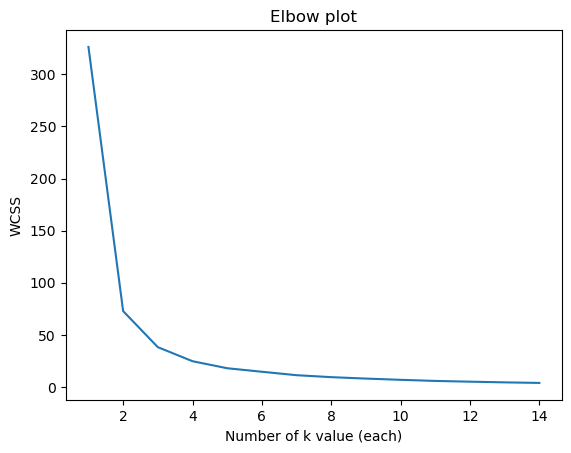

In [16]:
wcss = []

for each in range(1, 15):
    kmeans = KMeans(n_clusters=each)
    kmeans.fit(normalize_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow plot')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()


In [17]:
kmeans1 = KMeans(n_clusters=3)
cluster_k = kmeans1.fit_predict(normalize_df)

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
with_km_df = pd.DataFrame(normalize_df, columns=new_df.columns, index=new_df.index)
with_km_df['cluster'] = cluster_k
with_km_df.head()

,InvoiceDate,InvoiceNo,TotalPrice,cluster
CustomerID,,,,
12346.0,0.871314,0.000125,0.015109,1
12347.0,0.002681,0.022676,0.030297,0
12348.0,0.198391,0.003758,0.021442,0
12349.0,0.048257,0.009020,0.021303,0
12350.0,0.828418,0.002005,0.016288,1


In [19]:
with_km_df['cluster'].value_counts(ascending=True)

cluster
1     634
2     816
0    2922
Name: count, dtype: int64

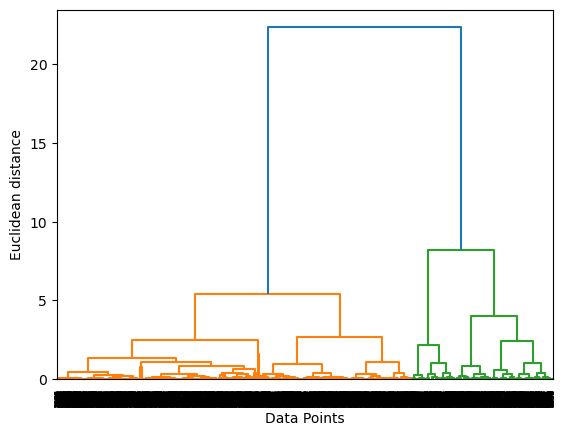

In [20]:
merging = linkage(normalize_df, method='ward')
dendrogram(merging, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [21]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_hc = hc.fit_predict(normalize_df)

In [22]:
with_hc_df = pd.DataFrame(normalize_df, columns=new_df.columns, index=new_df.index)
with_hc_df['cluster'] = cluster_hc
with_hc_df.head()

,InvoiceDate,InvoiceNo,TotalPrice,cluster
CustomerID,,,,
12346.0,0.871314,0.000125,0.015109,2
12347.0,0.002681,0.022676,0.030297,0
12348.0,0.198391,0.003758,0.021442,0
12349.0,0.048257,0.009020,0.021303,0
12350.0,0.828418,0.002005,0.016288,2


In [23]:
with_hc_df['cluster'].value_counts(ascending=True)


cluster
2     391
1     850
0    3131
Name: count, dtype: int64

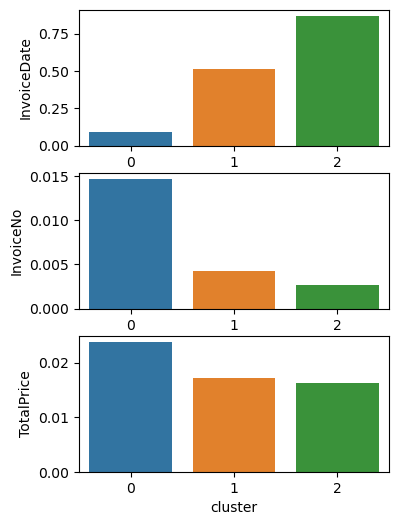

In [24]:
cluster_mean = with_hc_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'TotalPrice']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='TotalPrice', ax=axes[2])

plt.show()

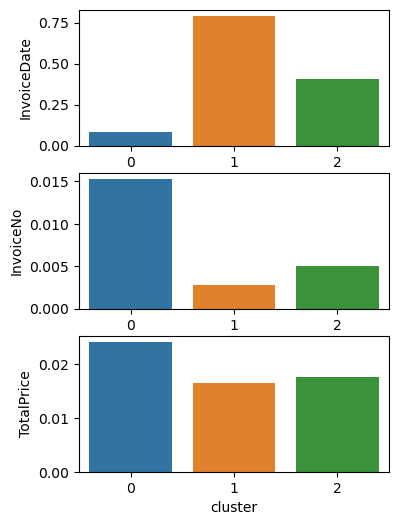

In [25]:
cluster_mean = with_km_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'TotalPrice']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='TotalPrice', ax=axes[2])

plt.show()